In [3]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df=pd.read_csv("Maharashtra.csv")


In [14]:
Days=np.array(df['days'])
print("Days",Days)
Confirmed=np.array(df['confirmed'])
print("Confirmed",Confirmed)
Deaths=np.array(df['deceased'])
print("Deaths",Deaths)
Recovered=np.array(df['recovered'])
print("Recoverd",Recovered)

Days [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104]
Confirmed [  14   18    6    3    3    4    4   12   10   23   10   15    3   31
   30   17   17   82   33   88   64  148  112  121  150  117  229  210
  187  221  352  346  236  285  120  327  552  466  552  431  778  390
  811  440  522  728  597  583 1008  790  678 1567  984 1233 1216 1089
 1165 1943 1230 1026 1495 1602 1576 1606 2347 2005 2078 2161 2345 2940
 2608 3041 2436 2091 2190 2598 2682 2940 2487 2358 2287 2560 2933 2436
 2739 3007 2554 2258 3254 3607 3493 3427 3390 2786 2701 3307 3752 3827
 3874 3870 3721 3214 3889 4842]
Deaths [   0    0    0    1    0 

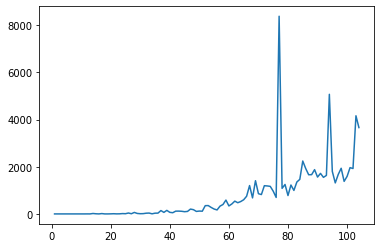

In [15]:
plt.plot(Days,Recovered)

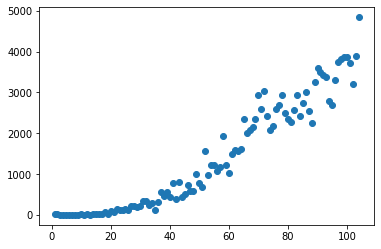

In [16]:
plt.scatter(Days,Confirmed)

In [17]:
random_indices=(np.random.permutation(104))
print(random_indices)
Days_train=Days[random_indices[:]]
print(Days_train)
Confirmed_train=Confirmed[random_indices[:]]
print(Confirmed_train)
Recovered_train=Recovered[random_indices[:]]
Recovered_test=Recovered[random_indices[80:]]
print(Recovered_train)
Deaths_train=Deaths[random_indices[:]]
print(Deaths_train)



[  8  91  37  88  18  84  33   5   9  71  74  39  55  27 103  87 101  95
  14  12  13  40  85  57  61  81  50  62  20  59  22  21  19 102   6  60
  76  54  89  34  79  45  44  23  70  65  46  38  42   2  73   1  52  25
  31  98  72  29  56  32  53  35  90  83  58  82  15  68  28  92  99  94
  47  96  51   0  24  49  69   7  97  75  86  48  41  80  93  66  77  63
  30  64  43  10  67  78  17  16  26  36   4 100  11   3]
[  9  92  38  89  19  85  34   6  10  72  75  40  56  28 104  88 102  96
  15  13  14  41  86  58  62  82  51  63  21  60  23  22  20 103   7  61
  77  55  90  35  80  46  45  24  71  66  47  39  43   3  74   2  53  26
  32  99  73  30  57  33  54  36  91  84  59  83  16  69  29  93 100  95
  48  97  52   1  25  50  70   8  98  76  87  49  42  81  94  67  78  64
  31  65  44  11  68  79  18  17  27  37   5 101  12   4]
[  10 3427  466 3254   33 2739  285    4   23 3041 2190  431 1089  210
 4842 2258 3214 3307   30    3   31  778 3007 1943 1602 2560  678 1576
   64 1026  

In [18]:
print(len(Confirmed_train))
print(len(Recovered_train))

104
104


In [19]:
#Linear Regression
def model_train(x_train,y_train):
  model=LinearRegression()#Instace for Linear Model
  #sklearn takes input as matrix so we have to reshape the matrix into column matrix
  x_train_for_fitting=np.matrix(x_train.reshape(len(x_train),1))
  y_train_for_fitting=np.matrix(y_train.reshape(len(y_train),1))
  
  #fit the data into the model
  return(model.fit(x_train_for_fitting,y_train_for_fitting))

In [20]:
model=model_train(Days_train,Confirmed_train)
model_prediction=model.predict(Days.reshape(len(Days),1))
print(Days_train)
print(Confirmed_train)

[  9  92  38  89  19  85  34   6  10  72  75  40  56  28 104  88 102  96
  15  13  14  41  86  58  62  82  51  63  21  60  23  22  20 103   7  61
  77  55  90  35  80  46  45  24  71  66  47  39  43   3  74   2  53  26
  32  99  73  30  57  33  54  36  91  84  59  83  16  69  29  93 100  95
  48  97  52   1  25  50  70   8  98  76  87  49  42  81  94  67  78  64
  31  65  44  11  68  79  18  17  27  37   5 101  12   4]
[  10 3427  466 3254   33 2739  285    4   23 3041 2190  431 1089  210
 4842 2258 3214 3307   30    3   31  778 3007 1943 1602 2560  678 1576
   64 1026  112  148   88 3889    4 1495 2682 1216 3607  120 2358  728
  522  121 2608 2005  597  552  811    6 2091   18  984  117  346 3874
 2436  221 1165  236 1233  327 3493 2436 1230 2933   17 2345  187 3390
 3870 2701  583 3752 1567   14  150  790 2940   12 3827 2598 2554 1008
  390 2287 2786 2078 2940 1606  352 2347  440   10 2161 2487   82   17
  229  552    3 3721   15    3]


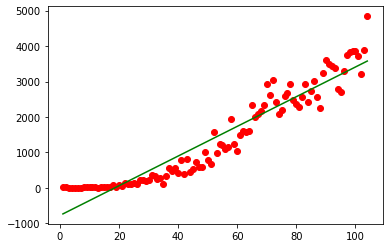

In [21]:
plt.scatter(Days_train,Confirmed_train,color="red")
plt.plot(Days.reshape(len(Days),1),model_prediction,color="green")

In [22]:
def poly_regr(X_train,Y_train,degree):
  polynom=PolynomialFeatures(degree=degree)
  X_poly=polynom.fit_transform(X_train.reshape(len(X_train),1))
  polyReg=LinearRegression()
  return polyReg.fit(X_poly,Y_train.reshape(len(Y_train),1))

In [23]:
polynom=PolynomialFeatures(degree=4)
model=poly_regr(Days_train,Confirmed_train,4)

In [24]:
print(model)

predict=model.predict(polynom.fit_transform(Days_train.reshape(len(Days_train),1)))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


In [31]:
#Creating Array Of Custom Days
Days_array=[]
for i in range(1,140):
  Days_array.append(i)
Days_predict=np.array(Days_array)
#Prdict the model on future date
predict_confirm=model.predict(polynom.fit_transform(Days_predict.reshape(len(Days_predict),1)))

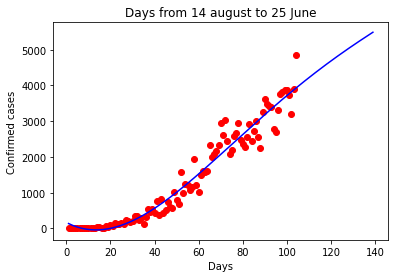

In [34]:
plt.title("Days from 14 august to 25 June")
plt.xlabel("Days")
plt.ylabel("Confirmed cases")
plt.scatter(Days_train,Confirmed_train,color="red")
plt.plot(Days_predict,predict_confirm,color="blue")